<a href="https://colab.research.google.com/github/navbharti/deeplearning-2022/blob/main/RNN_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RNN Sentiment Analysis


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# download the dataset
!wget https://github.com/elifbayirr/RNN-model-with-yelp-dataset/raw/main/yelp%20dataset.csv

--2023-01-05 20:06:09--  https://github.com/elifbayirr/RNN-model-with-yelp-dataset/raw/main/yelp%20dataset.csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/elifbayirr/RNN-model-with-yelp-dataset/main/yelp%20dataset.csv [following]
--2023-01-05 20:06:09--  https://raw.githubusercontent.com/elifbayirr/RNN-model-with-yelp-dataset/main/yelp%20dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62794 (61K) [text/plain]
Saving to: ‘yelp dataset.csv’

yelp dataset.csv    100%[===================>]  61.32K  --.-KB/s    in 0.01s   

2023-01-05 20:06:10 (5.30 MB/s) - ‘yelp dataset.csv’ saved [6

In [ ]:
# Read data 
df=pd.read_csv('/content/yelp dataset.csv', encoding = "ISO-8859-1")


In [ ]:
df.isnull().sum()

sentence        0
Unnamed: 1    997
label           0
dtype: int64

In [ ]:
x=df['sentence']
x

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
992    I think food should have flavor and texture an...
993                             Appetite instantly gone.
994    Overall I was not impressed and would not go b...
995    The whole experience was underwhelming, and I ...
996    Then, as if I hadn't wasted enough of my life ...
Name: sentence, Length: 997, dtype: object

In [ ]:
y=df['label']
y

0      1
1      0
2      0
3      1
4      1
      ..
992    0
993    0
994    0
995    0
996    0
Name: label, Length: 997, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
print("shape of X_train: ",X_train.shape)
print("shape of X_test: ",X_test.shape)
print("shape of y_train: ",y_train.shape)
print("shape of y_test: ",y_test.shape)
print(X_train[3]) 
print(y_train[3])

shape of X_train:  (797,)
shape of X_test:  (200,)
shape of y_train:  (797,)
shape of y_test:  (200,)
Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.
1


In [ ]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=1000,lower=True)
tokenizer.fit_on_texts(X_train)

In [ ]:
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
print(X_train[3]) 
print(y_train[3])

[42, 47, 16, 47, 75, 3, 20, 10, 81, 103, 5, 492, 360]
1


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
maxlen = 100
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
print(X_train[3, :])


[ 42  47  16  47  75   3  20  10  81 103   5 492 360   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
num_classes = 2

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print(y_train.shape)
print(y_train[0])

(797, 2)
[1. 0.]


In [ ]:
y_test

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation,SimpleRNN
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape)

X_test = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(797, 100, 1)
(200, 100, 1)


In [ ]:
model = Sequential()
#model.add(SimpleRNN(50, input_shape = (X_train.shape[1], X_train.shape[2],), return_sequences = False))
model.add(SimpleRNN(50, input_shape = (maxlen,1), return_sequences = False))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50)                2600      
                                                                 
 dense (Dense)               (None, 2)                 102       
                                                                 
 activation (Activation)     (None, 2)                 0         
                                                                 
Total params: 2,702
Trainable params: 2,702
Non-trainable params: 0
_________________________________________________________________


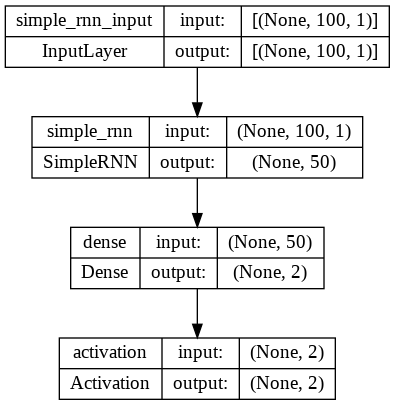

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
import tensorflow as tf
adam = tf.optimizers.Adam(lr = 0.001)
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
#model = KerasClassifier(build_fn = vanilla_rnn, epochs = 500, batch_size = 200)
model.fit(X_train, y_train, epochs = 500, batch_size = 200)

Epoch 1/500
4/4 [==============================] - 0s 77ms/step - loss: 0.6926 - accuracy: 0.5207
Epoch 2/500
4/4 [==============================] - 0s 81ms/step - loss: 0.6928 - accuracy: 0.5207
Epoch 3/500
4/4 [==============================] - 0s 93ms/step - loss: 0.6924 - accuracy: 0.5207
Epoch 4/500
4/4 [==============================] - 0s 62ms/step - loss: 0.6922 - accuracy: 0.5207
Epoch 5/500
4/4 [==============================] - 0s 61ms/step - loss: 0.6923 - accuracy: 0.5207
Epoch 6/500
4/4 [==============================] - 0s 63ms/step - loss: 0.6924 - accuracy: 0.5207
Epoch 7/500
4/4 [==============================] - 0s 46ms/step - loss: 0.6925 - accuracy: 0.5207
Epoch 8/500
4/4 [==============================] - 0s 32ms/step - loss: 0.6925 - accuracy: 0.5207
Epoch 9/500
4/4 [==============================] - 0s 31ms/step - loss: 0.6925 - accuracy: 0.5207
Epoch 10/500
4/4 [==============================] - 0s 35ms/step - loss: 0.6924 - accuracy: 0.5207
Epoch 11/500
4/4 [=

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
y_pred_ = np.argmax(y_pred, axis = 1)
y_test_ = np.argmax(y_test, axis = 1)
print(accuracy_score(y_pred_, y_test_))

7/7 [==============================] - 0s 6ms/step
0.46


In [ ]:
sen = ["I appreciate their service"]
a = tokenizer.texts_to_sequences(sen)
a=np.array(a)
a = pad_sequences(a, padding='post', maxlen=maxlen)

a = a.reshape((a.shape[0], a.shape[1], 1))
print(a.shape)

label =['Negative Sentiment', 'Positive Sentiment']

prediction = model.predict(np.array(a))
print(f"{sen}: is {label[ np.argmax( prediction ) ] }")

(1, 100, 1)
1/1 [==============================] - 0s 41ms/step
['I appreciate their service']: is Positive Sentiment
